##### Universidad Autónoma de Yucatán - Facultad de Ingeniería

# Proyecto 1 (A): Algoritmos de Regresión 
### Aprendizaje Automático 

## Multivariable Linear Regression: Estimar el costo de un seguro 
Antonio Ayora, Abril Esparza, Saúl Tax

In [430]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [431]:
#Cargando datos
df= pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [432]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [433]:
def sex_num(x):
    if x == "female":
        return 2
    else:
        return 1

def smoker_num(x):
    if x == "yes":
        return 2
    else:
        return 1
    
def region_num(x):
    if x == "southeast":
        return 1
    elif x == "southwest":
        return 2
    elif x == "northwest":
        return 3
    else:
        return 4

In [434]:
df['Sex_value'] = df['sex'].apply(sex_num)
df['Smoker_value']=df['smoker'].apply(smoker_num)
df['region_value']=df['region'].apply(region_num)
df.head()

,age,sex,bmi,children,smoker,region,charges,Sex_value,Smoker_value,region_value
0,19,female,27.900,0,yes,southwest,16884.92400,2,2,2
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,3
4,32,male,28.880,0,no,northwest,3866.85520,1,1,3


In [435]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Sex_value', 'Smoker_value', 'region_value'],
      dtype='object')

In [436]:
df = df.reindex(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region',
...       'Sex_value', 'Smoker_value', 'region_value', 'charges'])
df

,age,sex,bmi,children,smoker,region,Sex_value,Smoker_value,region_value,charges
0,19,female,27.900,0,yes,southwest,2,2,2,16884.92400
1,18,male,33.770,1,no,southeast,1,1,1,1725.55230
2,28,male,33.000,3,no,southeast,1,1,1,4449.46200
3,33,male,22.705,0,no,northwest,1,1,3,21984.47061
4,32,male,28.880,0,no,northwest,1,1,3,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,1,1,3,10600.54830
1334,18,female,31.920,0,no,northeast,2,1,4,2205.98080
1335,18,female,36.850,0,no,southeast,2,1,1,1629.83350
1336,21,female,25.800,0,no,southwest,2,1,2,2007.94500


In [437]:
df.describe()

,age,bmi,children,Sex_value,Smoker_value,region_value,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1.494768,1.204783,2.455157,13270.422265
std,14.049960,6.098187,1.205493,0.500160,0.403694,1.130197,12110.011237
min,18.000000,15.960000,0.000000,1.000000,1.000000,1.000000,1121.873900
25%,27.000000,26.296250,0.000000,1.000000,1.000000,1.000000,4740.287150
50%,39.000000,30.400000,1.000000,1.000000,1.000000,2.000000,9382.033000
75%,51.000000,34.693750,2.000000,2.000000,1.000000,3.000000,16639.912515
max,64.000000,53.130000,5.000000,2.000000,2.000000,4.000000,63770.428010


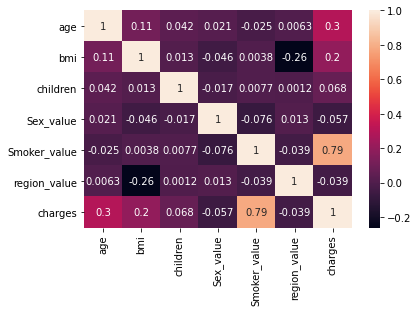

In [438]:
# Gráfico de correlación
sns.heatmap(df.corr(), annot=True)
plt.show()

In [439]:
#Definiendo features
X = df[['age', 'bmi', 'children','Sex_value', 'Smoker_value', 'region_value']].values
X.shape[0]

1338

In [440]:
#Normalizando datos
for i in range(X.shape[1]):
    max = X[:,i].max()
    min = X[:,i].min()
    X[:,i] = (X[:,i] - min)/(max - min)
 

In [441]:
#Definiendo salida 
y = df['charges'].values

In [442]:
X_train = []
y_train = []

X_test = []
y_test = []

for i in range(len(df)):
    if i <= int(len(df) * 0.8) : 
        X_train.append(X[i])
        y_train.append(y[i])
    elif  i > int(len(df) * 0.8) :
        y_test.append(y[i])
        X_test.append(X[i])


X_train = np.array(X_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
X_test = np.array(X_test)

In [443]:
# Agregando columna de 1's
X_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_b.shape[0]

1071

In [444]:
print("valores para la X de prueba: ",X_test.shape[0])
print("valores para la X de entrenamiento: ",X_train.shape[0])

valores para la X de prueba:  267
valores para la X de entrenamiento:  1071


In [445]:
def plotCorrelation(y_predicted, y_test, name): 
    plt.figure(figsize=(8,5))
    plt.scatter(y_predicted, y_test, c=y_test, cmap='Spectral')
    plt.title(name, fontsize =14)
    plt.xlabel('Predicciones', fontsize = 14)
    plt.ylabel('Charges', fontsize = 14)
    plt.grid()
    plt.show()

# Ecuación Normal
> ## $\hat{\theta} = (X^T X)^{-1} X^T {y}$

Se aplica la función de la ecuación normal para obtener los valores de pesos óptimos

In [446]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
print('El vector de pesos óptimos es: \n')
print(theta_best)

El vector de pesos óptimos es: 

[-3391.37558314 11910.27884603 12762.28478385  2175.7265214
   246.98481765 23715.30806014  1215.04222268]


Con los valores de prueba se obtienen las predicciones con:  $\hat{y} = \theta^T X$

In [447]:
X_new = np.array(X_test)
X_new_b = np.c_[np.ones((X_test.shape[0],1)), X_new]
y_predict_NE = X_new_b @ theta_best

In [448]:
y_predict_NE[:10]

array([14791.78666749,  3446.93384609, 12698.09979123,  9760.70791361,
        5595.46978348, 10711.74168703,  2057.94905037, 28310.57084827,
       15642.69853888,  -522.79341036])

In [449]:
y_test[:10]

array([13974.45555,  1909.52745, 12096.6512 , 13204.28565,  4562.8421 ,
        8551.347  ,  2102.2647 , 34672.1472 , 15161.5344 , 11884.04858])

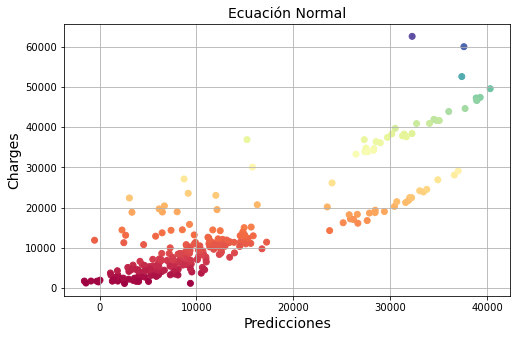

In [450]:
plotCorrelation(y_predict_NE, y_test, 'Ecuación Normal')

# Batch Gradient Descent

Se asignan los parametros necesarios 
$\eta:$ razón de aprendizaje

In [451]:
eta = 0.01
n_iterations =2001
m= X_b.shape[0]

Se inicializa $\theta$ con valores aleatorios

In [452]:
theta= np.random.randn(X_b.shape[1])
theta

array([-1.49680163,  1.60519505, -0.55462677,  0.00945444, -0.18213939,
        0.00526013, -0.77617429])

In [453]:
J_log = np.zeros(n_iterations)
for i in range(n_iterations):
    J_log[i]= (1/(2*m))*((X_b@theta-y_train)**2).sum()
    gradients = (1/m)*(X_b.T @ (X_b@theta - y_train))
    theta = theta - eta*gradients
    
print(theta)
print(J_log[i])

[ 1891.70785387 10079.07035352  5551.30868445  1578.02700067
  -283.59163805 22435.65987966  -301.17369578]
19305946.85525022


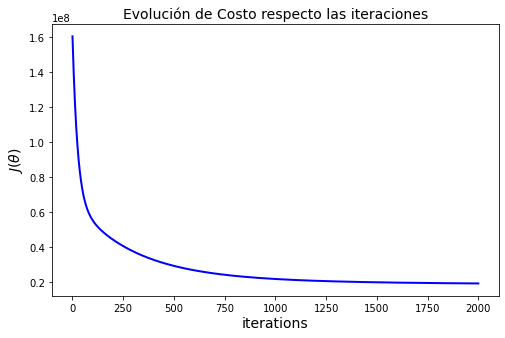

In [454]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(n_iterations), J_log, 'b-', linewidth=2)
plt.title ('Evolución de Costo respecto las iteraciones',fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.ylabel(r'$J(\theta)$', fontsize=14)
plt.show()

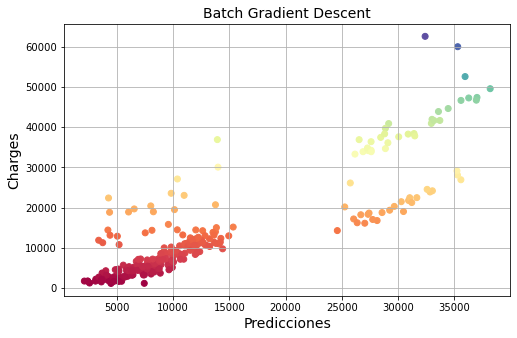

In [455]:
y_predict = X_new_b @ theta
plotCorrelation(y_predict, y_test, 'Batch Gradient Descent')

# Stochastic Gradient Descent

In [456]:
theta_SGD = np.random.randn(X_b.shape[1])
criteria = 1e-10
n = len(y_train)
J_SGD  = np.zeros(n_iterations)

#
#gradients = (1/m)*(X_b.T @ (X_b@theta - y_train))
for i in range(n_iterations): 
    J_ = 0 
    for j in range(n):
        index = np.random.randint(0, n)
        X_ = X_b[index,:].reshape(1,X_b.shape[1])
        y_  =y_train[index]
        #J_ = (1/(2*m))*((X_ @ theta_SGD - y_)**2).sum()
        gradient_SGD = (1/m) *(X_.T @ (X_ @ theta_SGD - y_))
        theta_SGD = theta_SGD - eta * gradient_SGD
        J_ = (1/(2*m))*((X_@theta_SGD -y_)**2).sum()
    J_SGD[i]= J_  
    #J_SGD[i]= J_
    if J_SGD[i] < criteria: 
        break



In [457]:
X_test_b = np.c_[np.ones((len(y_test),1)), X_test]
y_predicted = X_new_b @ theta_SGD


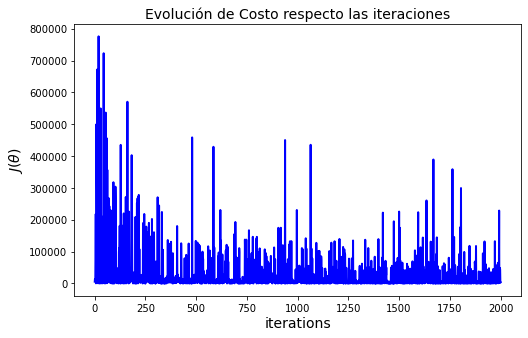

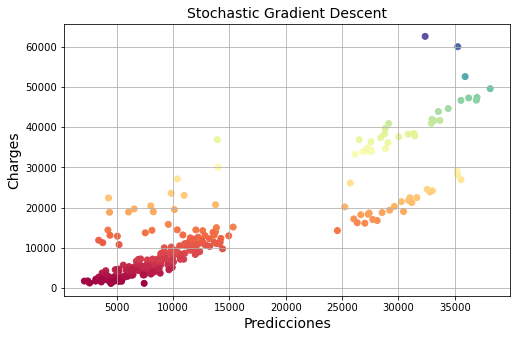

In [468]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(n_iterations), J_SGD, 'b-', linewidth=2)
plt.title ('Evolución de Costo respecto las iteraciones',fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.ylabel(r'$J(\theta)$', fontsize=14)
plt.show()


plotCorrelation(y_predicted, y_test, 'Stochastic Gradient Descent')

##### Mejor solución obtenida 

In [ ]:
#best solution
ite = 2001
eta = 0.01
num = X_train.shape[1]+1
theta2= np.random.randn(num)
row = X_train.shape[0]
#X_b = np.c_[np.ones((m,1)), X_train]
criteria = 1e-7

m = len(y_train)
J = np.zeros(ite)
for i in range(ite): 
    J_ = 0
    J_2 = 0
    for j in range(m):
        index = np.random.randint(0, m)
        X_ = X_b[index,:].reshape(1,X_b.shape[1])
        y_ = y_train[index]
        J_ = (2/m) * ((X_ @ theta2 - y_)**2)  #J_2 = (2/m) * ((X_ @ theta2 - y_)**2).sum()
        gradients = (1/m) * (X_.T @ (X_ @ theta2 - y_))
        theta2 = theta2 -eta*gradients
    J[i]= J_
    if J[i] < criteria: 
        break

print(J_)

In [ ]:
m =len(y_test)
X_test_b = np.c_[np.ones((m,1)), X_test]
y_predicted = X_test_b @ theta2
plt.plot(np.arange(ite), J, 'b-', linewidth=2)
plt.xlabel('iterations', fontsize=14)
plt.ylabel(r'$J(\theta)$', fontsize=14)
plt.show()
plt.scatter(y_predicted, y_test, c=y_test, cmap='Spectral')
plt.show()

# Mini-Batch Gradient Descent

In [463]:
theta_MB = np.random.randn(X_b.shape[1])
criteria = 1e-7
batch = 35
m = len(y_train)
J_MB = np.zeros(n_iterations)

for i in range(n_iterations): 
    J_ = 0
    for j in range(0,m,batch):
        X_ = X_b[j:j+batch]
        y_ = y_train[j:j+batch]
        J_ = (1/(2*m))*((X_ @ theta_MB-y_)**2).sum()
        gradients_MB = (1/m) * (X_.T @ (X_ @ theta_MB - y_))
        theta_MB = theta_MB - eta*gradients_MB
    J_MB[i] = J_
    if J_MB[i] < criteria: 
        break

print(J_)

199143.77144369492


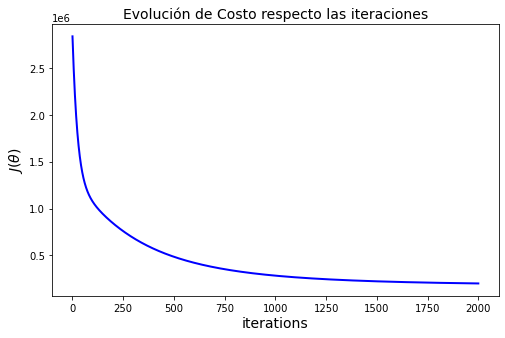

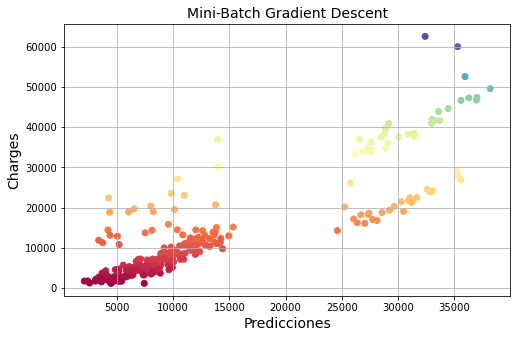

In [469]:
X_test_b = np.c_[np.ones((len(y_test),1)), X_test]
y_predicted_MB = X_test_b @ theta_MB

plt.figure(figsize=(8,5))
plt.plot(np.arange(n_iterations), J_MB, 'b-', linewidth=2)
plt.title ('Evolución de Costo respecto las iteraciones',fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.ylabel(r'$J(\theta)$', fontsize=14)
plt.show()



plotCorrelation(y_predicted_MB, y_test, 'Mini-Batch Gradient Descent')

# Comparación de resultados

Se comparan los diferentes vectores de pesos óptimos obtenidos con cada método:
   * Ecuación Normal
   * Batch Gradient Descent
   * Stochastic Gradient Descent
   * Mini-Batch Gradient Descent

In [465]:
print(theta_best)
print(theta)
print(theta_SGD)
print(theta_MB)

[-3391.37558314 11910.27884603 12762.28478385  2175.7265214
   246.98481765 23715.30806014  1215.04222268]
[ 1891.70785387 10079.07035352  5551.30868445  1578.02700067
  -283.59163805 22435.65987966  -301.17369578]
[ 1890.79431288 10075.30511019  5534.19558049  1574.21969622
  -286.71018234 22422.63899538  -293.18365344]
[ 1892.75359969 10077.21954382  5551.49270302  1578.02267407
  -283.57836065 22433.4969111   -300.91781293]


Text(0.5, 0, 'predicciones')

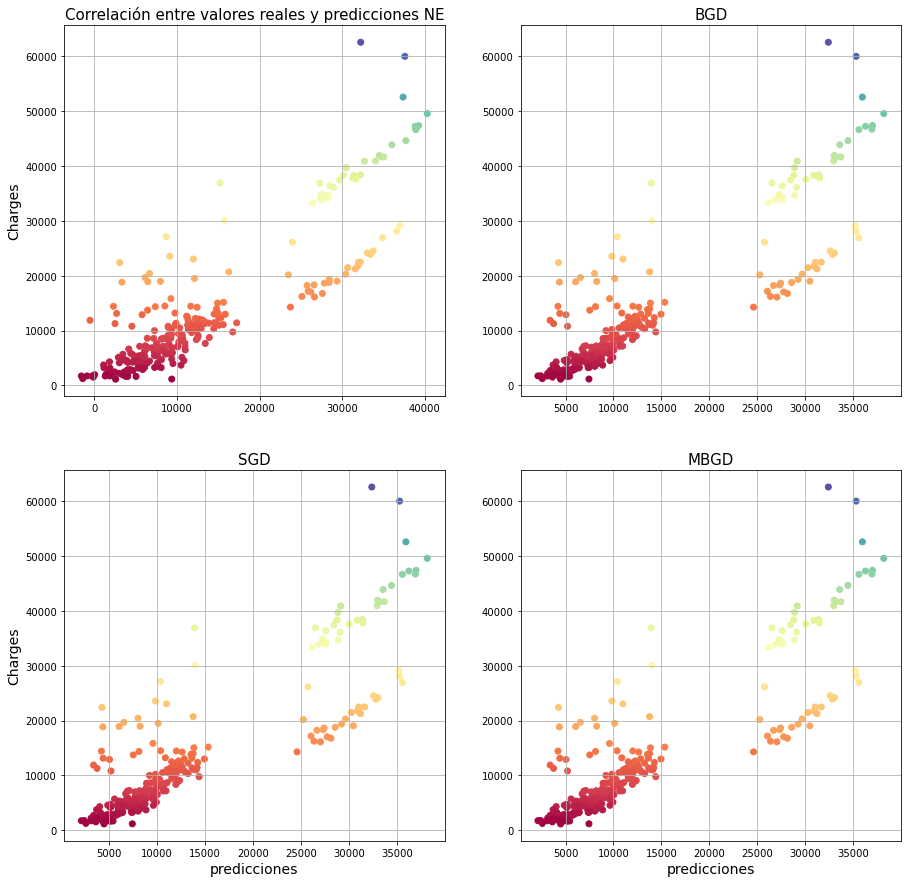

In [466]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Correlación entre valores reales y predicciones NE', fontsize = 15)
plt.scatter(y_predict_NE, y_test, c=y_test, cmap='Spectral')
plt.ylabel('Charges', fontsize=14)
plt.grid()
plt.subplot(2,2,2)
plt.title('BGD', fontsize = 15)
plt.scatter(y_predict, y_test, c=y_test, cmap='Spectral')
plt.grid()
plt.subplot(2,2,3)
plt.title('SGD', fontsize = 15)
plt.scatter(y_predicted, y_test, c=y_test, cmap='Spectral')
plt.grid()
plt.xlabel('predicciones', fontsize= 14)
plt.ylabel('Charges', fontsize=14)
plt.subplot(2,2,4)
plt.title('MBGD', fontsize = 15)
plt.scatter(y_predicted_MB, y_test, c=y_test, cmap='Spectral')
plt.grid()
plt.xlabel('predicciones', fontsize= 14)

